In [11]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [12]:
def sympyFunction(tf):
    num, den = ctl.tfdata(tf)
    s = sp.var('s')
    num_expr = sum(coef*s**i for i, coef in enumerate(num[0][0][::-1]))
    den_expr = sum(coef*s**i for i, coef in enumerate(den[0][0][::-1]))
    sympy_system = num_expr/den_expr
    return sympy_system

def roundSympyFunction(expr, num_digits=10):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(sp.Float)})

# PROJETANDO O CONTROLADOR
- Usando a frequência de corte $f_c = 0.1\,\text{Hz}$
- Com isso temos a frequência natural $\omega_c = 2\pi f_c$

In [13]:
f_c = 0.1
w_c = 2*np.pi*f_c

f_c, w_c

(0.1, 0.6283185307179586)

A função de transferência do filtro de segunda ordem tem cara: 

- $C(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$ $\,\,\,\,\,\,\,\,\,$ onde $\omega_n$ é a frequência natural (ou frequência de corte) do filtro em rad/s.$

- Sabemos que para atenuação ideal, $|C|_{s \to j\omega_c} = \frac{1}{\sqrt{2}} = 0.707 = \zeta$

In [14]:
s = ctl.TransferFunction.s
w_n  = w_c
zeta = 0.7071067811865475

C = w_n**2 / (s**2 + 2*zeta*w_n*s + w_n**2)
print(sympyFunction(C))
C

0.394784176043574/(1.0*s**2 + 0.888576587631673*s + 0.394784176043574)


TransferFunction(array([0.39478418]), array([1.        , 0.88857659, 0.39478418]))

In [15]:
poles = ctl.poles(C)
poles
print(poles)

[-0.44428829+0.44428829j -0.44428829-0.44428829j]


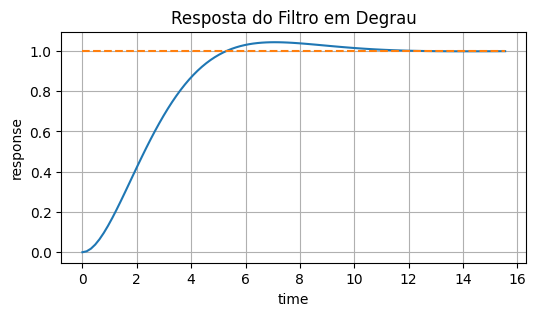

In [16]:
time, response = ctl.step_response(C)

plt.figure(figsize=(6, 3))
plt.plot(time, response)
plt.plot(time, [1 for i in time], '--')
plt.title('Resposta do Filtro em Degrau')
plt.xlabel('time')
plt.ylabel('response')
plt.grid()
plt.show()

#### TESTE GRÁFICO
- O gráfico abaixo mostra que quando a frequência se aproxima da frequência $\omega_{desired}$, ocorre a atenuação

c:\Users\march\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


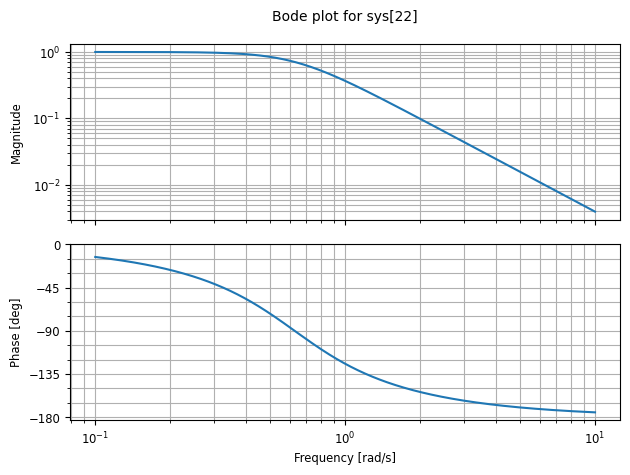

In [17]:
mag, fase, omega = ctl.bode(C, plot=True)

#### TESTE NUMÉRICO
- Vamos através dos vetores de magnitude e fase ver qual é a frequência onde ocorre a atenuação, obtendo a linha da tabela com a menor diferença entre o $\omega_{desired}$ que encontramos, e o $\omega$ da tabela. Vemos que nessa linha, a magnitude foi atenuada para um valor bem baixo
- A magnitude no ponto de frequência de corte deve ser igual a $\frac{1}{\sqrt{2}} = 0.707$ para a devida atenuação, vamos ver se isso realmente ocorre em $|C|_{s \to j\omega_c}$

In [18]:
1/np.sqrt(2)

np.float64(0.7071067811865475)

In [19]:
mag = sympyFunction(C).subs(s, sp.I*w_c)
mag = sp.N(sp.Abs(mag))
float(mag)

0.7071067811865475